Tarea: Análisis de sentimientos de tweets


En esta tarea, utilizarás spaCy para realizar el análisis de sentimientos de un conjunto de tweets. Para ello, deberás seguir los siguientes pasos:
1. Descarga el archivo Tweets.csv que se encuentra en el siguiente enlace: https://github.com/ruchitgandhi/Twitter-Airline-Sentiment-Analysis/blob/master/Tweets.csv

2. Lee el archivo tweets.csv y carga su contenido en un objeto de tipo pandas.DataFrame.

3. Utilizando el modelo de lenguaje pre-entrenado **es_core_news_lg**, procesa los textos de los tweets y extrae las entidades mencionadas en cada uno de ellos. Almacena la información de las entidades en una nueva columna del DataFrame.

4. Utilizando el modelo de lenguaje pre-entrenado **es_core_news_lg**, procesa los textos de los tweets y realiza el análisis de sentimientos de cada uno de ellos. Almacena el puntaje de sentimiento (entre 0 y 1) en una nueva columna del DataFrame.

5. Crea una gráfica de barras que muestre la cantidad de tweets positivos, negativos y neutros.

6. Crea una tabla que muestre las entidades más mencionadas en los tweets, junto con la cantidad de veces que aparecen y el puntaje promedio de sentimiento en los tweets en los que aparecen.

7. Utilizando la biblioteca **wordcloud**, crea una nube de palabras que muestre las palabras más comunes en los tweets. Ajusta los parámetros de la nube de palabras para que tenga un aspecto estético agradable.

8. Escribe una breve conclusión sobre los resultados obtenidos.

1. Descarga el archivo tweets.csv que se encuentra en el siguiente enlace: https://github.com/ruchitgandhi/Twitter-Airline-Sentiment-Analysis/blob/master/Tweets.csv

In [ ]:
#Write your code here.
import pandas as pd
import numpy as np
import spacy
import re
from textblob import TextBlob
import matplotlib.pyplot as plt


2. Lee el archivo tweets.csv y carga su contenido en un objeto de tipo pandas.DataFrame.

In [ ]:
#Write your code here.
df=pd.read_csv("Tweets.csv")
df

In [ ]:
def cleanTweets(text):
    text = re.sub('@[A-Za-z0-9_]+', '', text) #removes @mentions
    text = re.sub('#','',text) #removes hastag '#' symbol
    text = re.sub('RT[\s]+','',text)
    text = re.sub('https?:\/\/\S+', '', text) 
    text = re.sub('\n',' ',text)
    return text

In [ ]:
df['text'] =df['text'].apply(cleanTweets) # apply cleanTweet function to the tweet
df['text'].head() 

0                                          What  said.
1     plus you've added commercials to the experien...
2     I didn't today... Must mean I need to take an...
3     it's really aggressive to blast obnoxious "en...
4             and it's a really big bad thing about it
Name: text, dtype: object


3. Utilizando el modelo de lenguaje pre-entrenado es_core_news_lg, procesa los textos de los tweets y extrae las entidades mencionadas en cada uno de ellos. Almacena la información de las entidades en una nueva columna del DataFrame.

In [ ]:
#Write your code here.
!python -m spacy download es_core_news_lg

nlp = spacy.load("es_core_news_lg")

2023-04-12 19:22:21.119808: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 568.0/568.0 MB 2.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_lg')


4. Utilizando el modelo de lenguaje pre-entrenado es_core_news_lg, procesa los textos de los tweets y realiza el análisis de sentimientos de cada uno de ellos. Almacena el puntaje de sentimiento (entre 0 y 1) en una nueva columna del DataFrame.



In [ ]:
#Write your code here.
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

In [ ]:
df['polarity']=df['text'].apply(getPolarity)
df=df[['text','polarity']].copy()
df

,text,polarity
0,What said.,0.000000
1,plus you've added commercials to the experien...,0.000000
2,I didn't today... Must mean I need to take an...,-0.390625
3,"it's really aggressive to blast obnoxious ""en...",0.006250
4,and it's a really big bad thing about it,-0.350000
...,...,...
14635,thank you we got on a different flight to Chi...,0.000000
14636,leaving over 20 minutes Late Flight. No warni...,-0.300000
14637,Please bring American Airlines to BlackBerry10,0.000000
14638,"you have my money, you change my flight, and ...",-0.125000


5. Crea una gráfica de barras que muestre la cantidad de tweets positivos, negativos y neutros.

In [ ]:
def getAnalysis(score):
    if score<0:
        return 'Negativo'
    elif score ==0:
        return 'Neutral'
    else:
        return 'Positivo'
    
df['analisis'] =df['polarity'].apply(getAnalysis)
df['polarity'].value_counts()

 0.000000    5492
 0.200000     468
 0.500000     449
 0.250000     384
 0.100000     257
             ... 
-0.045076       1
-0.131818       1
-0.206250       1
 0.394531       1
 0.208000       1
Name: polarity, Length: 1513, dtype: int64

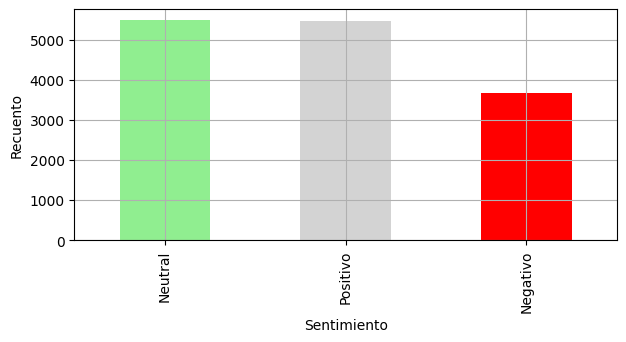

In [ ]:
#Write your code here.
fig = plt.figure(figsize=(7,3))
color = ['lightgreen','lightgrey','red']
df['analisis'].value_counts().plot(kind='bar',color = color)
plt.ylabel('Recuento')
plt.xlabel('Sentimiento')
plt.grid(True)
plt.show()


6. Crea una tabla que muestre las entidades más mencionadas en los tweets, junto con la cantidad de veces que aparecen y el puntaje promedio de sentimiento en los tweets en los que aparecen.

In [ ]:
#Write your code here.

def extraer_entidades(text):
    doc = nlp(text)
    entity_counts = {}
    for ent in doc.ents:
        if ent.text not in entity_counts:
            entity_counts[ent.text] = 1
        else:
            entity_counts[ent.text] += 1
    return entity_counts

# Apply the function to the 'text' column of the DataFrame
df['entities'] = df['text'].apply(extraer_entidades)

# Create a new DataFrame with entity counts
entity_counts = {}
for row in df['entities']:
    for entity, count in row.items():
        if entity not in entity_counts:
            entity_counts[entity] = count
        else:
            entity_counts[entity] += count
entity_counts_df = pd.DataFrame({'entity': list(entity_counts.keys()),
                                 'count': list(entity_counts.values())})

# Print the resulting DataFrame
print(entity_counts_df)

In [ ]:
entity_counts_df=entity_counts_df.sort_values(by='count',ascending=False)
entity_counts_df.head()


7. Utilizando la biblioteca wordcloud, crea una nube de palabras que muestre las palabras más comunes en los tweets. Ajusta los parámetros de la nube de palabras para que tenga un aspecto estético agradable.

In [ ]:
#Write your code here.
from wordcloud import WordCloud

In [ ]:
wordcloud = WordCloud().generate(str(entity_counts_df[['entity']].iloc[:50]))

AttributeError: ignored

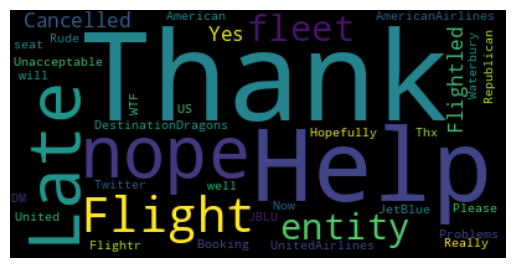

In [ ]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


8. Escribe una breve conclusión sobre los resultados obtenidos.

Mi conclusión es que el dataframe que hemos creado de entidades y la representación de wordcloud son coherentes ya que se pueden apreciar en una cantidad muy similar palabras positivas (thank, well, thx, hopefully..) como palabras neutrales ( flight, booking, how...) y algunas negativas (nope, late, unacceptable...)